In [1]:
# Imports from python packages
import sys
import numpy as np
import matplotlib.pyplot as plt

# Imports from my packages (see the folder called utils)
sys.path.append('../../utils/')
from bremsstrahlung import tot_cs_sp_gauss, tot_cs_sp_quad
from screening import Fermi_length
from SeltzerBerger import tot_cs_SB

# Style of the plot
plt.style.use('../../utils/minimal.style')

In [2]:
# Physical parameters
Z = 47
Lf = Fermi_length(Z)

In [3]:
# discretization of g1 axis
N = 100
axis_g1m1 = np.logspace(-3., 4., N)
axis_g1 = 1. + axis_g1m1
axis_T1 = axis_g1m1 * 0.511 # MeV

In [4]:
# We try several minimum bounds
axis_kmin = np.logspace(-7.,-5., 2)
Nk = len(axis_kmin)

In [5]:
# Compute the total cross-section
sigma_gauss_log = np.array([tot_cs_sp_gauss(Z, g1, Lf, kmin=1.e-7, if_log=True) for g1 in axis_g1])
sigma_gauss_lin = np.array([tot_cs_sp_gauss(Z, g1, Lf, kmin=0., if_log=False) for g1 in axis_g1])

In [6]:
# Non-relativistic cross-section with Elwert correction
# We introduce on purpose the wrong term 1/beta_1 ** 2
p1 = np.sqrt(axis_g1 ** 2 - 1.)
b1 = np.sqrt(1.-(1. / axis_g1 ** 2))
sigma_gauss_log_error = sigma_gauss_log.copy()
sigma_gauss_log_error[axis_g1<2] = sigma_gauss_log_error[axis_g1<2] * (p1[axis_g1<2] / b1[axis_g1<2]) ** 2
sigma_gauss_lin_error = sigma_gauss_lin.copy()
sigma_gauss_lin_error[axis_g1<2] = sigma_gauss_lin_error[axis_g1<2] * (p1[axis_g1<2] / b1[axis_g1<2]) ** 2

In [7]:
# Total cross-section computed from the data of Seltzer and Berger
axis_seltzer, sigma_seltzer, _ = tot_cs_SB(Z)

[6.24395701e-19 2.50708085e-18 1.57150185e-17 6.27224797e-17
 2.48341559e-16 1.49052908e-15 5.55765311e-15 1.94742423e-14
 8.81429491e-14 2.39207293e-13 5.76384740e-13 9.24470292e-13
 1.27414631e-12 1.62445581e-12 1.97398196e-12 2.67175646e-12
 3.36882016e-12 5.10180336e-12 6.83201777e-12 1.02686894e-11
 1.36879872e-11 1.70981499e-11 2.05081692e-11 2.73055265e-11
 3.40750909e-11 6.78855198e-11 1.68892786e-10 3.37197305e-10
 6.73631786e-10 1.68259652e-09 3.36585742e-09]
[1.60154850e+18 3.98870265e+17 6.36333962e+16 1.59432472e+16
 4.02671227e+15 6.70902711e+14 1.79932065e+14 5.13498797e+13
 1.13452070e+13 4.18047456e+12 1.73495225e+12 1.08170052e+12
 7.84839225e+11 6.15590767e+11 5.06590244e+11 3.74285612e+11
 2.96839829e+11 1.96009122e+11 1.46369643e+11 9.73834109e+10
 7.30567603e+10 5.84858600e+10 4.87610566e+10 3.66226228e+10
 2.93469503e+10 1.47306819e+10 5.92091599e+09 2.96562275e+09
 1.48449052e+09 5.94319547e+08 2.97101117e+08]


In [8]:
sigma_quad = np.array([tot_cs_sp_quad(Z, g1, Lf) for g1 in axis_g1])
sigma_quad[axis_g1<2] = sigma_quad[axis_g1<2] * (p1[axis_g1<2] / b1[axis_g1<2]) ** 2

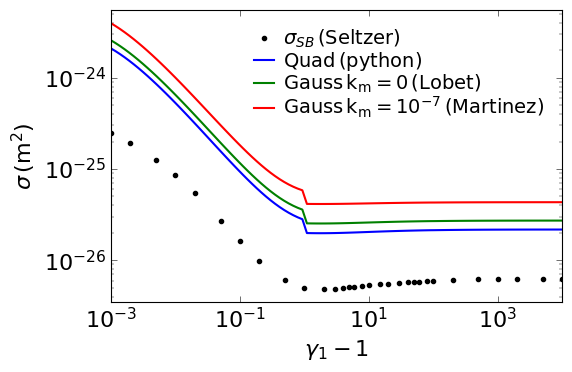

In [9]:
cc = ['b', 'g', 'r']

# Figure
fig, axs = plt.subplots(1, 1, figsize=(6,4))
axs.plot(axis_seltzer, sigma_seltzer, ls='', marker='o', c='k', label=r"$\sigma_{SB} \, \rm (Seltzer)$")
axs.plot(axis_g1m1, sigma_quad, c=cc[0], label=r'$ \rm Quad \, \rm (python) $')
axs.plot(axis_g1m1, sigma_gauss_lin_error, c=cc[1], label=r'$ \rm Gauss \, k_m=0  \, (Lobet)$')
axs.plot(axis_g1m1, sigma_gauss_log_error, c=cc[2], label=r'$ \rm Gauss \, k_m=10^{-7} \, (Martinez)$')
#axs.plot(axis_g1m1, sigma_gauss_lin, ls='--', c=cc[1])
#axs.plot(axis_g1m1, sigma_gauss_log, ls='--', c=cc[2])
axs.set_xscale('log')
axs.set_xlabel(r"$ \gamma_1 - 1 $")
axs.set_xlim([1.e-3, 1.e4])
axs.set_yscale('log')
axs.set_ylabel(r"$ \sigma \, \rm (m^2) $")
#axs.set_ylim([1.e-26, 1.e-22])
#axs.set_ylim([-0.1, 1.5])
plt.legend(loc='best', ncol=1)
plt.tight_layout()
#fig.savefig('../figures/figure_3_12', bbox_inches='tight')

plt.show()